In [1]:
import numpy as np # for linear algebra
import pandas as pd # for data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
data = pd.read_csv('D:/MBA ITBM2023-25/Sem 2/BA/Assignment/test.csv')

In [3]:
# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# statistic libraries
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB

In [4]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [5]:
# To get basic info about columns in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
#To check for nulls
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
# To get statistical information about quantitative variables
quantitative_features = data[['age','balance','day','duration','campaign','pdays','previous']]
quantitative_features.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [8]:
# To get counts of each class in every qualitative feature
qualitative_variables = data[['job','marital','education','default','housing','loan','contact','month','poutcome','y']]
for qualitative_variable in qualitative_variables:
    print(data[qualitative_variable].value_counts())
    print('')

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

no     4445
yes      76
Name: default, dtype: int64

yes    2559
no     1962
Name: housing, dtype: int64

no     3830
yes     691
Name: loan, dtype: int64

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

no     4000
yes     521
Name: y, dty

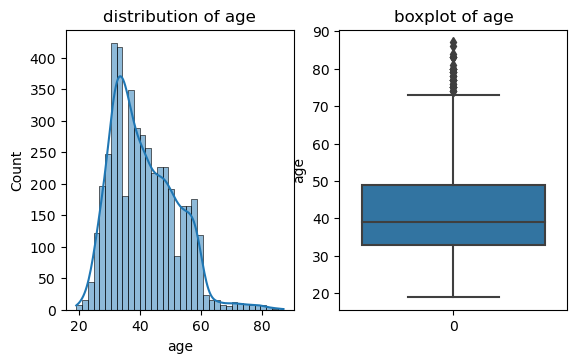

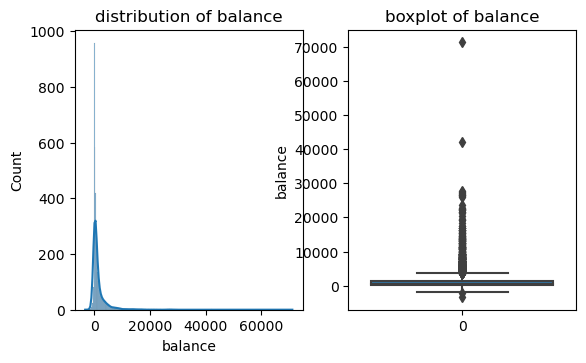

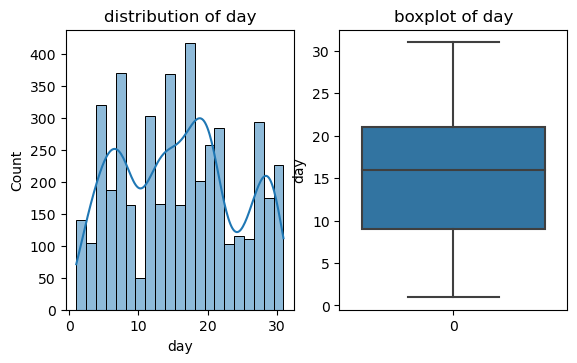

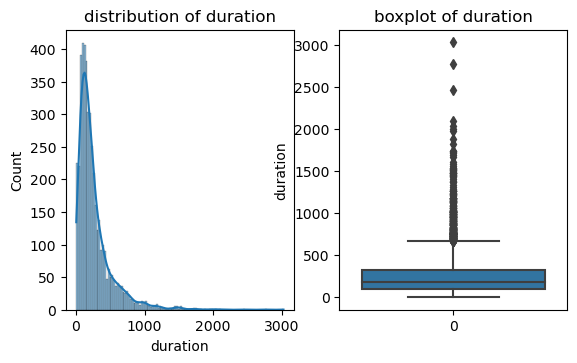

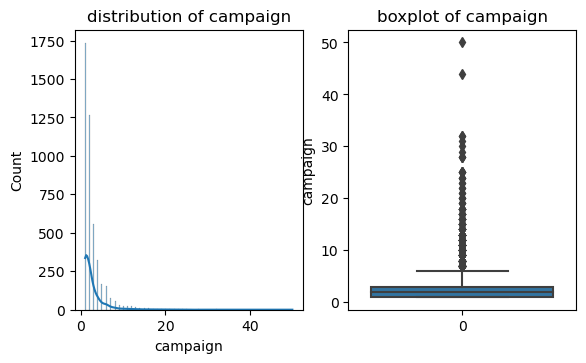

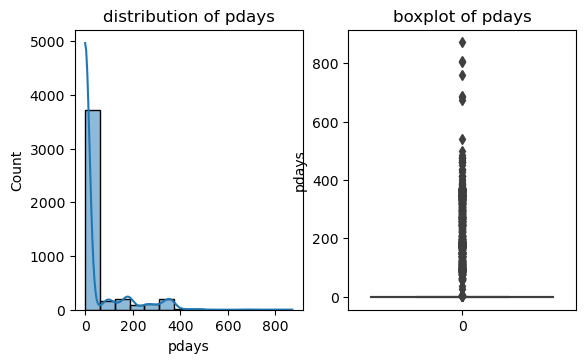

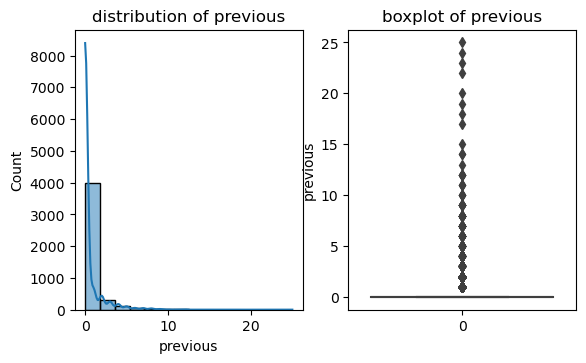

In [9]:
# To visualize the distribution of all features in the data set and box plot of all features in the data set
for i in data.columns:
    if data[i].dtype !="object":
        plt.figure(figsize=(10, 8))
        
        plt.subplot(2,3,1)
        sns.histplot(data[i], kde=True)
        plt.title(f"distribution of {i}")
        
        plt.subplot(2,3,2)
        sns.boxplot(data[i])
        plt.ylabel(i)
        plt.title(f"boxplot of {i}")
        

In [10]:
# To use LabelEncoder to convert qualitative features to quantitative features 
data = data.apply(LabelEncoder().fit_transform)
data


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,11,10,1,0,0,1475,0,0,0,18,10,75,0,0,0,3,0
1,14,7,1,1,0,2030,1,1,0,10,8,216,0,228,4,0,0
2,16,4,2,2,0,1303,1,0,0,15,0,181,0,219,1,0,0
3,11,4,1,2,0,1352,1,1,2,2,6,195,3,0,0,3,0
4,40,1,1,1,0,274,1,0,2,4,8,222,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,14,7,1,1,0,119,1,0,0,29,5,325,4,0,0,3,0
4517,38,6,1,2,1,0,1,1,2,8,8,149,0,0,0,3,0
4518,38,9,1,1,0,558,0,0,0,18,1,147,10,0,0,3,0
4519,9,1,1,1,0,1187,0,0,0,5,3,125,3,140,3,1,0


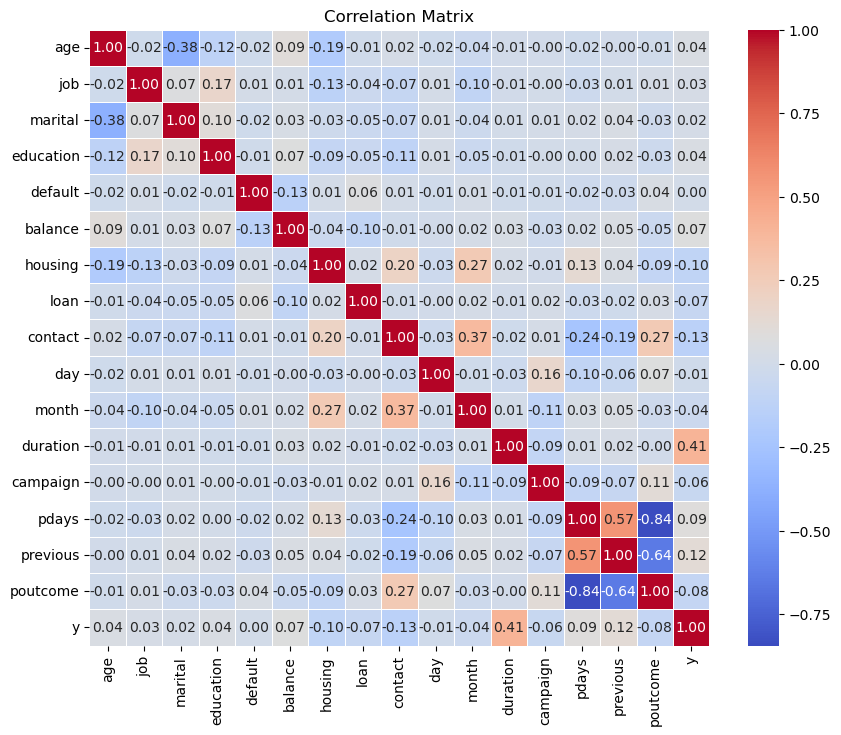

In [11]:
#Heat map/ correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidth=.5)
plt.title('Correlation Matrix')
plt.show()